In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy
from rtbm import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal

RTBM_precision= 1e-5

Process PoolWorker-6:
Process PoolWorker-8:
Process PoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-4:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
Process PoolWorker-2:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
Traceback (most recent call last):
    self.run()
    task = get()
    self._target(*self._args, **self._kwargs)
Process PoolWorker-3:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    self._target(*self._args, **self._kwargs)
    self.run()
  File "/usr/lib/pyt

# Example 1: Sine-Mixture with gaussian noise

In [ ]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [32]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,2,phase=1))
M.add(layers.DiagExpectationUnitLayer(2,2,phase=1))
M.add(layers.DiagExpectationUnitLayer(2,1,phase=1))

In [33]:
minim = minimizer.CMA(False)
minim.train(mse(), M, X, Y, maxiter=1000)

CMA on 1 cpu(s) enabled
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 18 (seed=977493, Sun Nov  5 07:25:06 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 2.235907372719246e-01 1.0e+00 9.35e-01  9e-01  1e+00 0:00.0
    2     24 2.180538922940893e-01 1.1e+00 9.22e-01  9e-01  9e-01 0:00.1
    3     36 2.204682687841606e-01 1.1e+00 8.98e-01  9e-01  9e-01 0:00.2
   41    492 2.123267402377624e-01 2.0e+00 5.83e-01  5e-01  7e-01 0:03.2
   93   1116 2.080124931150461e-01 3.6e+00 3.96e-01  2e-01  5e-01 0:07.2
  100   1200 2.088655170864556e-01 3.9e+00 3.76e-01  2e-01  4e-01 0:07.8
  178   2136 2.016922074357054e-01 9.7e+00 1.13e-01  6e-02  1e-01 0:13.8
  200   2400 1.983064017307101e-01 1.1e+01 1.25e-01  6e-02  1e-01 0:15.5
  300   3600 1.812958074221261e-01 3.1e+01 1.76e-01  7e-02  3e-01 0:23.2
  400   4800 1.063258459637979e-01 6.0e+01 3.17e-01  7e-02  5e-01 0:31.1
  500   6000 8.867994505187682e-02 8.4e+01 8.08e-02  1e-02  1e-01 0:39.1
  600   7

array([-6.67716857, -1.53954557,  1.9705677 ,  0.28260688,  7.06976534,
        6.51555369, -1.15418654,  1.73231656,  5.57931605, -1.47068231,
       -4.35969792,  0.62894004,  8.75501704,  9.94628428, -0.97586643,
       -2.28448243, -9.10498483,  2.31595426])

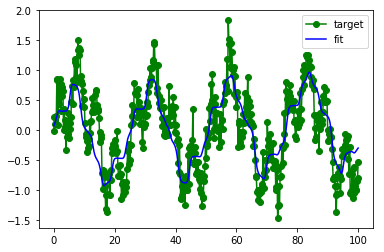

In [34]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit')
plt.legend()

In [16]:
M.get_layer(1)._Nout

3

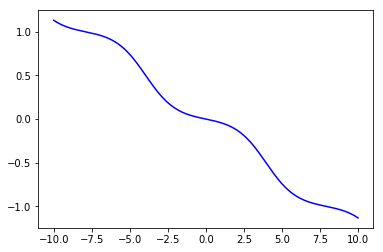

In [31]:
M.get_layer(1).show_activation(1,10)

In [36]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,2))
M.add(layers.DiagExpectationUnitLayer(2,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=10, maxiter=10000, nesterov=True,momentum=0.1, batch_size=100)

Iteration 0 in 0.16(s), cost = 0.251126
Iteration 100 in 16.41(s), cost = 0.238363
Iteration 200 in 32.59(s), cost = 0.235810
Iteration 300 in 48.76(s), cost = 0.233906
Iteration 400 in 64.92(s), cost = 0.232027
Iteration 500 in 81.09(s), cost = 0.230070
Iteration 600 in 97.30(s), cost = 0.228004
Iteration 700 in 113.67(s), cost = 0.225847
Iteration 800 in 129.99(s), cost = 0.223673
Iteration 900 in 146.23(s), cost = 0.221583
Iteration 1000 in 162.50(s), cost = 0.219658
Iteration 1100 in 178.72(s), cost = 0.224213
Iteration 1200 in 194.91(s), cost = 0.224034
Iteration 1300 in 211.13(s), cost = 0.223643
Iteration 1400 in 227.31(s), cost = 0.223157
Iteration 1500 in 243.55(s), cost = 0.222604
Iteration 1600 in 259.77(s), cost = 0.222054
Iteration 1700 in 275.97(s), cost = 0.221493
Iteration 1800 in 292.19(s), cost = 0.220959
Iteration 1900 in 308.35(s), cost = 0.220447
Iteration 2000 in 324.58(s), cost = 0.221801
Iteration 2100 in 340.85(s), cost = 0.224186
Iteration 2200 in 357.08(s), c

array([-0.04514702+0.j,  0.31393822+0.j,  0.63029571+0.j,  1.52400251+0.j,
        4.54470663+0.j,  9.65259611+0.j,  1.26822781+0.j, -0.97313169+0.j,
        1.09870297+0.j,  0.38785576+0.j,  0.69108423+0.j,  1.678528  +0.j,
       12.51306005+0.j, 12.04889511+0.j, -5.28962943+0.j, -2.30578307+0.j,
        5.53390161+0.j, 10.45273707+0.j])

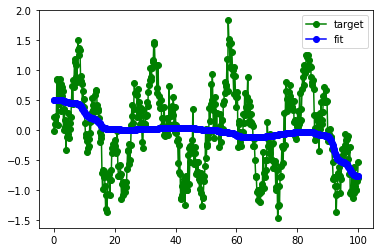

In [37]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example: Intrawave modulation

In [ ]:
def func(x,n):
    return np.cos(0.01*x+0.5*np.cos(0.05*x))/(2+np.sin(0.04*x))

X = np.linspace(0, 1000, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"b-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,5, phase=1j))
M.add(layers.DiagExpectationUnitLayer(5,5, phase=1j))
M.add(layers.DiagExpectationUnitLayer(5,3, phase=1j))
M.add(layers.DiagExpectationUnitLayer(3,1, phase=1j))

In [ ]:
minim = minimizer.CMA(False)
minim.train(mse(), M, X, Y, maxiter=1000)

In [ ]:
npoints = 1000
test_X = (np.linspace(0, 1000, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")

# Example 3: Saw-tooth

In [ ]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,10, Wmax=0.5,Qmax=1,param_bound=10, phase=1j))
M.add(layers.DiagExpectationUnitLayer(10,1, Wmax=0.5,Qmax=1,param_bound=10, phase=1j))

minim = minimizer.CMA(parallel=False)
minim.train(mse(), M, X, Y, maxiter=1000)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
#plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (work in progress...)

In [ ]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:10000,0]
X_train = MNIST_train[0:10000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [ ]:
M = mdl.Model()
#M.add(layers.Linear(784,1,paramBound=100))
M.add(layers.DiagExpectationUnitLayer(784,1,Qmax=5,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(784,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(25,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(10,1))
#M.add(layers.SoftMaxLayer(10))
#M.add(layers.MaxPosLayer(10,1))

#enc = LabelBinarizer()
#enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
#enc.classes_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#T=enc.transform(Y_train)


In [ ]:
minim = minimizer.CMA(True)

sol=minim.train(mse(), M, np.transpose(X_train), np.transpose(Y_train), maxiter=1000)

In [ ]:
#P=np.argmax(np.real(M.predict(np.transpose(X_train))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
#P=np.argmax(np.real(M.predict(np.transpose(X_test))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))


print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))